In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split

%config InlineBackend.figure_format='svg'

G:\newage2\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
df=pd.read_csv('train_Data.csv')

In [3]:
df.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype='object')

In [4]:
df_min=df[df['9']==1]

In [5]:
df_min.to_csv('glass1_minority_train.csv',index=False)
df_min=pd.read_csv('glass1_minority_train.csv')

In [6]:
df_majority=df[df['9']==0]
df_majority.to_csv('glass1_majority_train.csv',index=False)
df_majority=pd.read_csv('glass1_majority_train.csv')

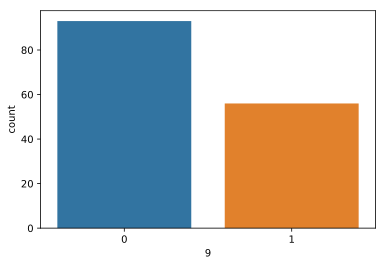

In [7]:
%matplotlib inline
sns.countplot(x='9',data=df)

In [8]:
def create_dataset(dataset,look_back=1):
    
    datax,datay=[],[]
    
    for i in range(len(dataset)-look_back-1):
        a=dataset[i:(i+look_back),:]
        datax.append(a)
        datay.append(dataset[i+look_back,:])
    
    return np.array(datax),np.array(datay)

In [9]:
df_minor=np.array(df_min)
scaler=MinMaxScaler(feature_range=(0,1))

df_minor=scaler.fit_transform(df_min)

x,y=create_dataset(df_minor,5)#5
print(x.shape)
print(y.shape)

(50, 5, 10)
(50, 10)


In [10]:
Xtrain,xtest,Ytrain,ytest=train_test_split(x,y,test_size=0.40,random_state=60)

In [11]:
model=Sequential()
model.add(LSTM(20,input_shape=(Xtrain.shape[1],Xtrain.shape[2])))#5
model.add(Dense(10))

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 20)                2480      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                210       
Total params: 2,690
Trainable params: 2,690
Non-trainable params: 0
_________________________________________________________________
None


In [12]:
model.compile(loss='mse',optimizer='adam')

In [13]:
history=model.fit(Xtrain,Ytrain,epochs=500,verbose=1)

Epoch 1/500
30/30 [==============================] - 6s 211ms/step - loss: 0.2461
Epoch 2/500
30/30 [==============================] - 0s 668us/step - loss: 0.2405
Epoch 3/500
30/30 [==============================] - 0s 602us/step - loss: 0.2343
Epoch 4/500
30/30 [==============================] - 0s 702us/step - loss: 0.2279
Epoch 5/500
30/30 [==============================] - 0s 702us/step - loss: 0.2215
Epoch 6/500
30/30 [==============================] - 0s 789us/step - loss: 0.2152
Epoch 7/500
30/30 [==============================] - 0s 719us/step - loss: 0.2091
Epoch 8/500
30/30 [==============================] - 0s 635us/step - loss: 0.2031
Epoch 9/500
30/30 [==============================] - 0s 735us/step - loss: 0.1973
Epoch 10/500
30/30 [==============================] - 0s 551us/step - loss: 0.1916
Epoch 11/500
30/30 [==============================] - 0s 652us/step - loss: 0.1861
Epoch 12/500
30/30 [==============================] - 0s 735us/step - loss: 0.1808
Epoch 13/500


Epoch 100/500
30/30 [==============================] - 0s 652us/step - loss: 0.0440
Epoch 101/500
30/30 [==============================] - 0s 802us/step - loss: 0.0440
Epoch 102/500
30/30 [==============================] - 0s 602us/step - loss: 0.0439
Epoch 103/500
30/30 [==============================] - 0s 802us/step - loss: 0.0439
Epoch 104/500
30/30 [==============================] - 0s 735us/step - loss: 0.0438
Epoch 105/500
30/30 [==============================] - 0s 668us/step - loss: 0.0438
Epoch 106/500
30/30 [==============================] - 0s 919us/step - loss: 0.0438
Epoch 107/500
30/30 [==============================] - 0s 752us/step - loss: 0.0437
Epoch 108/500
30/30 [==============================] - 0s 769us/step - loss: 0.0437
Epoch 109/500
30/30 [==============================] - 0s 852us/step - loss: 0.0437
Epoch 110/500
30/30 [==============================] - 0s 635us/step - loss: 0.0436
Epoch 111/500
30/30 [==============================] - 0s 652us/step - loss:

Epoch 198/500
30/30 [==============================] - 0s 702us/step - loss: 0.0407
Epoch 199/500
30/30 [==============================] - 0s 668us/step - loss: 0.0407
Epoch 200/500
30/30 [==============================] - 0s 769us/step - loss: 0.0407
Epoch 201/500
30/30 [==============================] - 0s 802us/step - loss: 0.0406
Epoch 202/500
30/30 [==============================] - 0s 835us/step - loss: 0.0406
Epoch 203/500
30/30 [==============================] - 0s 568us/step - loss: 0.0406
Epoch 204/500
30/30 [==============================] - 0s 668us/step - loss: 0.0405
Epoch 205/500
30/30 [==============================] - 0s 820us/step - loss: 0.0405
Epoch 206/500
30/30 [==============================] - 0s 836us/step - loss: 0.0405
Epoch 207/500
30/30 [==============================] - 0s 685us/step - loss: 0.0404
Epoch 208/500
30/30 [==============================] - 0s 719us/step - loss: 0.0404
Epoch 209/500
30/30 [==============================] - 0s 719us/step - loss:

30/30 [==============================] - 0s 702us/step - loss: 0.0368
Epoch 296/500
30/30 [==============================] - 0s 568us/step - loss: 0.0368
Epoch 297/500
30/30 [==============================] - 0s 602us/step - loss: 0.0367
Epoch 298/500
30/30 [==============================] - 0s 769us/step - loss: 0.0367
Epoch 299/500
30/30 [==============================] - 0s 602us/step - loss: 0.0366
Epoch 300/500
30/30 [==============================] - 0s 668us/step - loss: 0.0366
Epoch 301/500
30/30 [==============================] - 0s 602us/step - loss: 0.0365
Epoch 302/500
30/30 [==============================] - 0s 702us/step - loss: 0.0365
Epoch 303/500
30/30 [==============================] - 0s 745us/step - loss: 0.0365
Epoch 304/500
30/30 [==============================] - 0s 836us/step - loss: 0.0364
Epoch 305/500
30/30 [==============================] - 0s 735us/step - loss: 0.0364
Epoch 306/500
30/30 [==============================] - 0s 719us/step - loss: 0.0363
Epoch 

Epoch 393/500
30/30 [==============================] - 0s 702us/step - loss: 0.0321
Epoch 394/500
30/30 [==============================] - 0s 735us/step - loss: 0.0320
Epoch 395/500
30/30 [==============================] - 0s 668us/step - loss: 0.0320
Epoch 396/500
30/30 [==============================] - 0s 874us/step - loss: 0.0319
Epoch 397/500
30/30 [==============================] - 0s 735us/step - loss: 0.0318
Epoch 398/500
30/30 [==============================] - 0s 869us/step - loss: 0.0318
Epoch 399/500
30/30 [==============================] - 0s 702us/step - loss: 0.0317
Epoch 400/500
30/30 [==============================] - 0s 752us/step - loss: 0.0317
Epoch 401/500
30/30 [==============================] - 0s 752us/step - loss: 0.0316
Epoch 402/500
30/30 [==============================] - 0s 819us/step - loss: 0.0316
Epoch 403/500
30/30 [==============================] - 0s 719us/step - loss: 0.0315
Epoch 404/500
30/30 [==============================] - 0s 635us/step - loss:

Epoch 491/500
30/30 [==============================] - 0s 652us/step - loss: 0.0257
Epoch 492/500
30/30 [==============================] - 0s 752us/step - loss: 0.0257
Epoch 493/500
30/30 [==============================] - 0s 585us/step - loss: 0.0256
Epoch 494/500
30/30 [==============================] - 0s 518us/step - loss: 0.0255
Epoch 495/500
30/30 [==============================] - 0s 719us/step - loss: 0.0255
Epoch 496/500
30/30 [==============================] - 0s 852us/step - loss: 0.0254
Epoch 497/500
30/30 [==============================] - 0s 702us/step - loss: 0.0253
Epoch 498/500
30/30 [==============================] - 0s 602us/step - loss: 0.0252
Epoch 499/500
30/30 [==============================] - 0s 602us/step - loss: 0.0252
Epoch 500/500
30/30 [==============================] - 0s 652us/step - loss: 0.0251


In [14]:
model.save('7-24-2019-glass1.h5')

In [15]:
Xtrain.shape

(30, 5, 10)

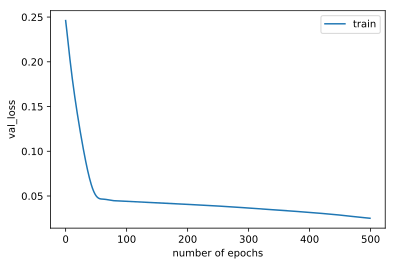

In [16]:
plt.plot(history.history['loss'],label='train')
#plt.plot(history.history['val_loss'],label='test')
plt.xlabel('number of epochs')
plt.ylabel('val_loss')
plt.legend()
#pyplot.savefig('LSTM training.png',dpi=300)
plt.show()

In [17]:
prediction=model.predict(xtest)

In [18]:
def draw_prediction(ytest,d,columns):
    
    _,axes=plt.subplots(len(columns),1,figsize=(10,20))
    
    for i,cols in enumerate(columns):
        
        axes[i].plot(ytest[:,i],label='real',color='blue')
        axes[i].plot(d[:,i],label='prediction',color='orange')
        #axes[i].set_xlabel='index'
        #axes[i].set_ylabel=cols
        axes[i].xlabel='index'
        axes[i].ylabel=cols

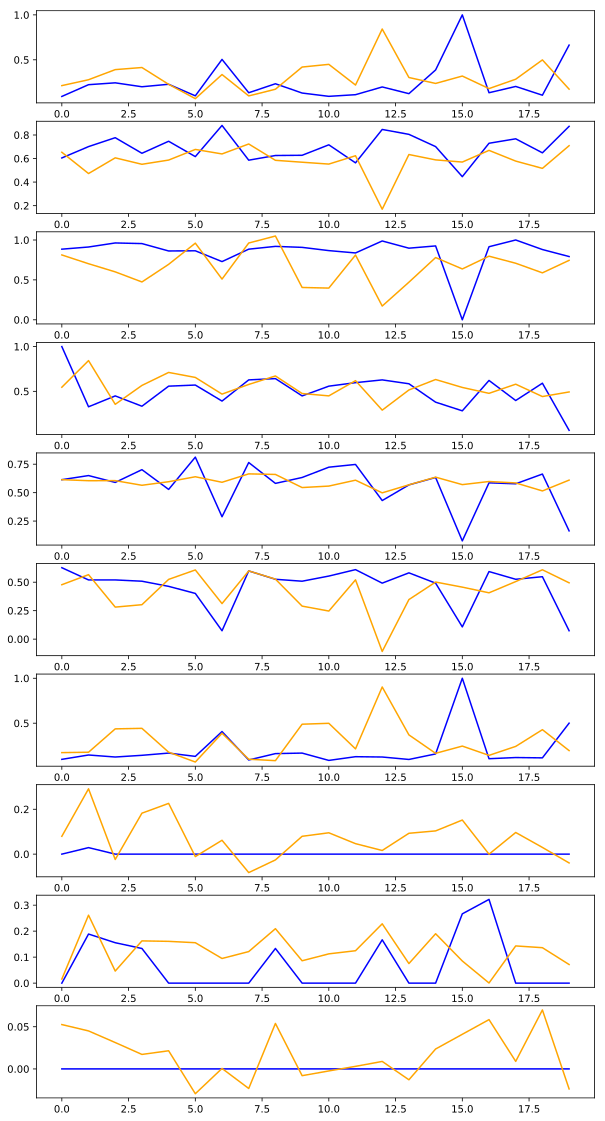

In [19]:
clmns=df.columns
draw_prediction(ytest,prediction,clmns)

In [20]:
prediction

array([[ 2.12321296e-01,  6.53388619e-01,  8.12572777e-01,
         5.45534730e-01,  6.14112020e-01,  4.77618158e-01,
         1.72804177e-01,  7.94241875e-02,  1.56744421e-02,
         5.25407568e-02],
       [ 2.77937263e-01,  4.72592562e-01,  7.02379942e-01,
         8.43104124e-01,  6.04958057e-01,  5.66118240e-01,
         1.77186564e-01,  2.91182578e-01,  2.61481076e-01,
         4.50095981e-02],
       [ 3.90502989e-01,  6.05873704e-01,  6.00329816e-01,
         3.54705513e-01,  6.05595648e-01,  2.81066239e-01,
         4.37050283e-01, -2.39289217e-02,  4.65026498e-02,
         3.12431976e-02],
       [ 4.14004385e-01,  5.51135600e-01,  4.73880202e-01,
         5.65751612e-01,  5.64815164e-01,  3.02183062e-01,
         4.42906678e-01,  1.82649598e-01,  1.62575543e-01,
         1.71642005e-02],
       [ 2.26770848e-01,  5.86963594e-01,  6.94759846e-01,
         7.10951090e-01,  5.96068025e-01,  5.24528146e-01,
         1.77760616e-01,  2.26245657e-01,  1.60795733e-01,
         2.

In [21]:
prediction2=scaler.inverse_transform(prediction)

In [22]:
ytest2=scaler.inverse_transform(ytest)

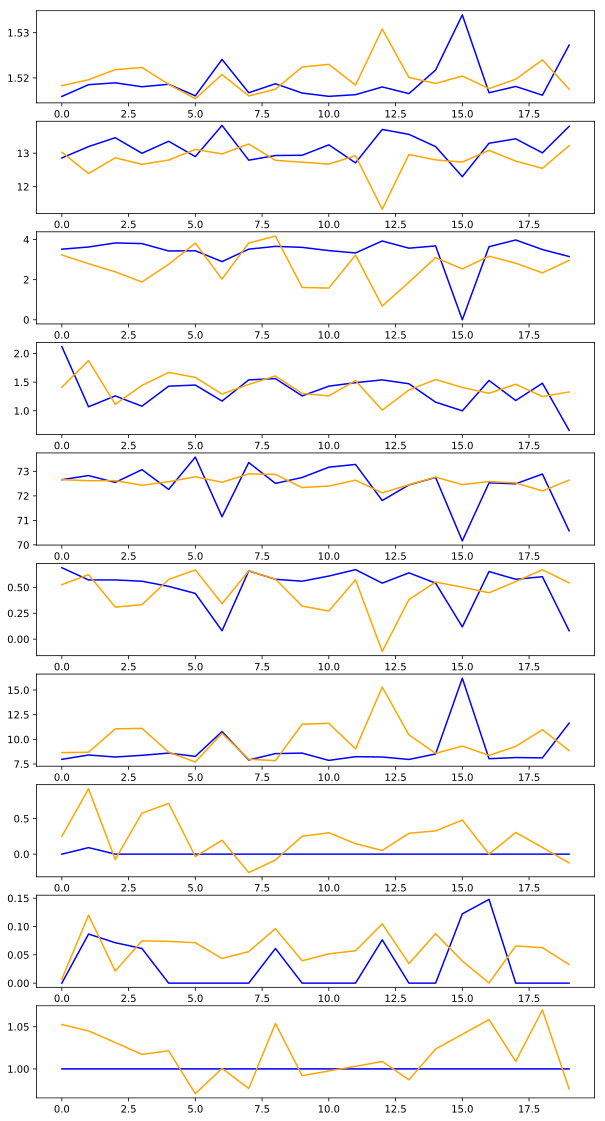

In [23]:
draw_prediction(ytest2,prediction2,clmns)

In [24]:
prediction

array([[ 2.12321296e-01,  6.53388619e-01,  8.12572777e-01,
         5.45534730e-01,  6.14112020e-01,  4.77618158e-01,
         1.72804177e-01,  7.94241875e-02,  1.56744421e-02,
         5.25407568e-02],
       [ 2.77937263e-01,  4.72592562e-01,  7.02379942e-01,
         8.43104124e-01,  6.04958057e-01,  5.66118240e-01,
         1.77186564e-01,  2.91182578e-01,  2.61481076e-01,
         4.50095981e-02],
       [ 3.90502989e-01,  6.05873704e-01,  6.00329816e-01,
         3.54705513e-01,  6.05595648e-01,  2.81066239e-01,
         4.37050283e-01, -2.39289217e-02,  4.65026498e-02,
         3.12431976e-02],
       [ 4.14004385e-01,  5.51135600e-01,  4.73880202e-01,
         5.65751612e-01,  5.64815164e-01,  3.02183062e-01,
         4.42906678e-01,  1.82649598e-01,  1.62575543e-01,
         1.71642005e-02],
       [ 2.26770848e-01,  5.86963594e-01,  6.94759846e-01,
         7.10951090e-01,  5.96068025e-01,  5.24528146e-01,
         1.77760616e-01,  2.26245657e-01,  1.60795733e-01,
         2.

In [25]:
new_data=pd.DataFrame(prediction2)

In [26]:
new_data.to_csv('new_corrected_data-v1-7-24-2019.csv',index=False)